# Initial exploratory analysis of the terminal dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [3]:
terminals_og_df = pd.read_csv('./data/terminals.csv')
terminals_og_df = terminals_og_df.set_index("TERMINAL_ID")

In [4]:
terminals_og_df.head()

,x_terminal_id,y_terminal__id
TERMINAL_ID,,
9754224,41.536730,68.889911
37467861,61.864075,20.882662
20678215,70.530677,36.567633
12724021,92.961874,66.721471
2989793,38.756717,68.669003


In [5]:
terminals_og_df.describe()

,x_terminal_id,y_terminal__id
count,5000.000000,5000.000000
mean,49.678916,49.612862
std,29.023968,28.899875
min,0.007245,0.007370
25%,24.775757,24.389356
50%,49.375401,49.320768
75%,74.370125,75.319330
max,99.994897,99.997795


In [6]:
missing_values = terminals_og_df.isnull().sum()
print(missing_values)

x_terminal_id     0
y_terminal__id    0
dtype: int64


Text(0.5, 1.0, 'Plot of first 30 terminals x and y coordinates')

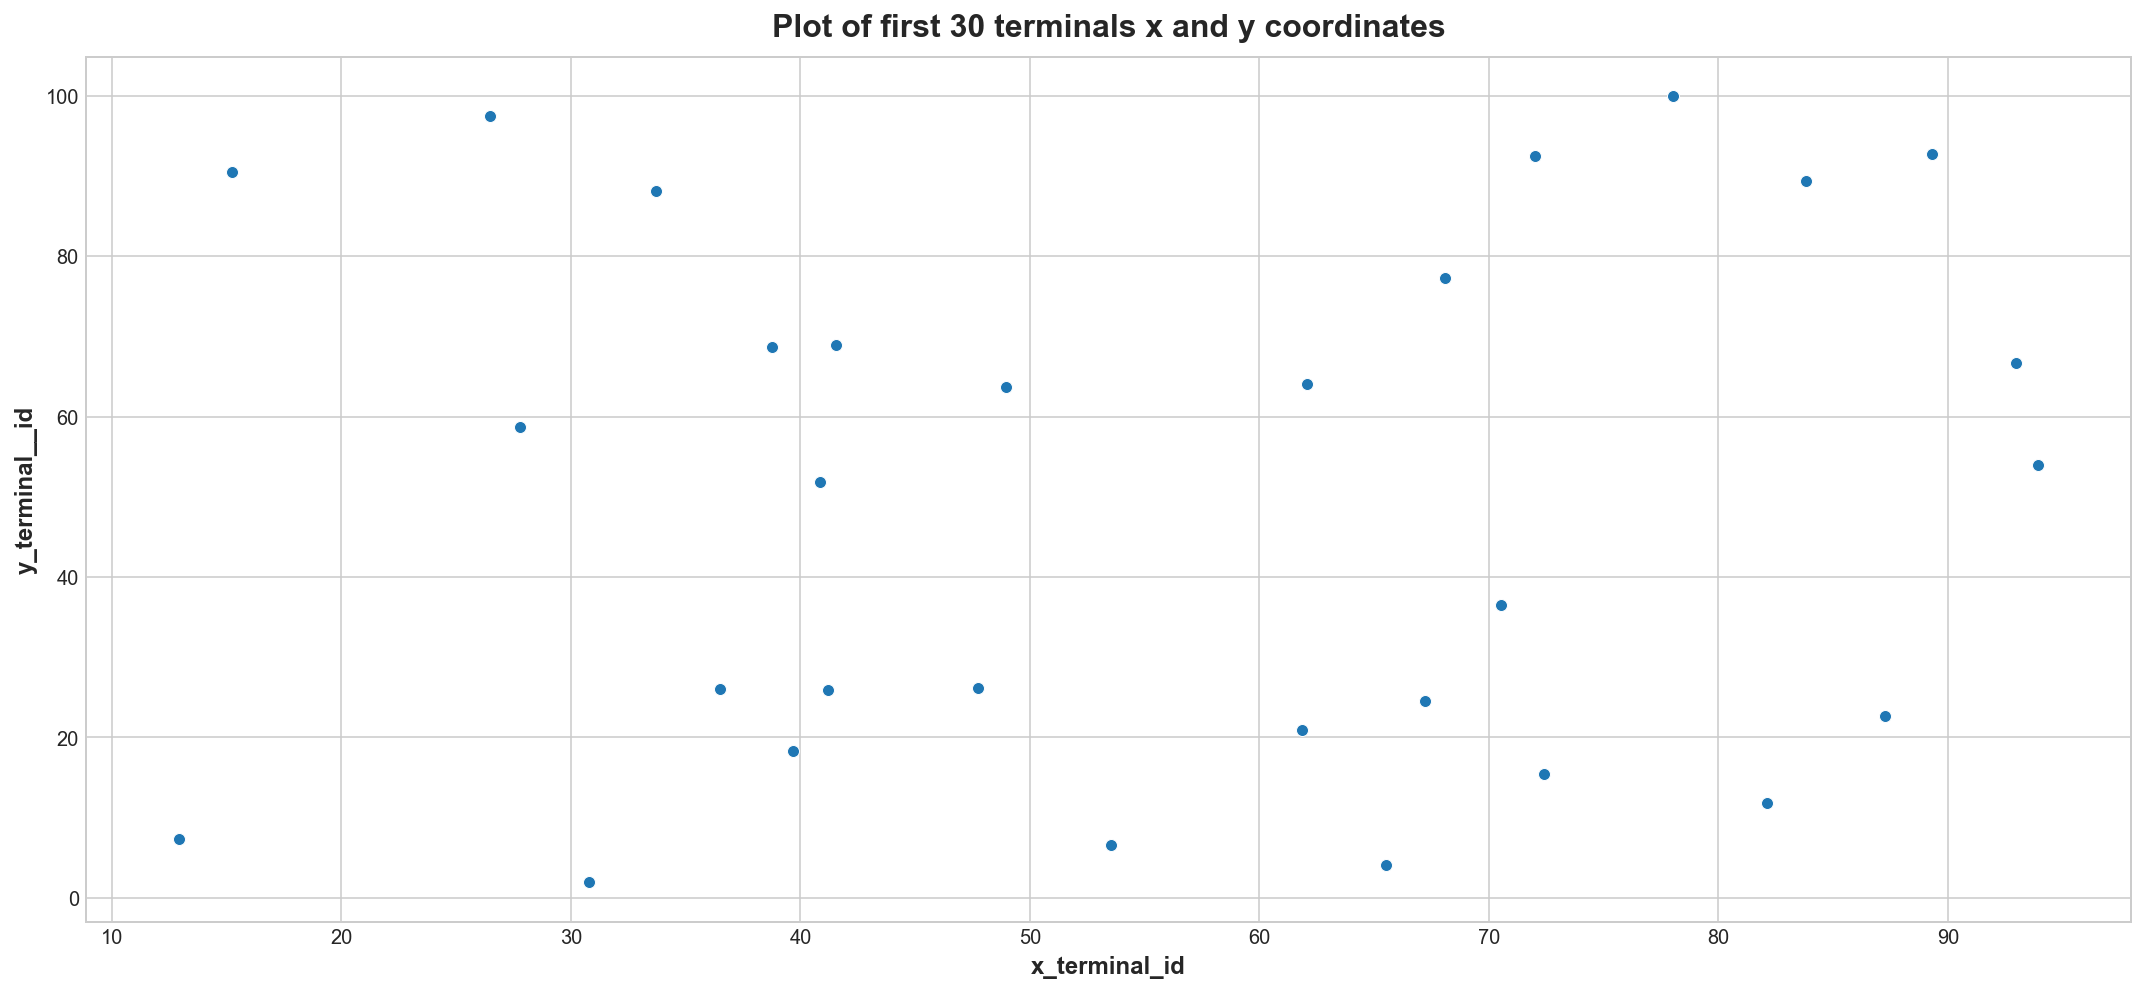

In [7]:
plt.rc("figure", autolayout=True, figsize=(15, 7))
sns.scatterplot(x=terminals_og_df['x_terminal_id'][:30],y=terminals_og_df['y_terminal__id'][:30])
plt.title("Plot of first 30 terminals x and y coordinates")

In [8]:
transactions_train_og = pd.read_csv('./data/transactions_train.csv', usecols=['TX_ID','TERMINAL_ID','TX_FRAUD'])
transactions_train_og = transactions_train_og.set_index("TERMINAL_ID")

In [9]:
transactions_train_og.head()

,TX_ID,TX_FRAUD
TERMINAL_ID,,
55875360,c6dde46458f3d1cfeb9256f8add45a14fb349f8f,0
31418810,ddd7cafa71ee84f3b46498fb6aa9f92450116719,0
84302882,fe42708ae41a8f25259b96c25e2d6067568c224c,0
26364082,c3c6ffdc73d71f35c0da72032420e15289e4d073,0
34582161,ced166cbbafcf3dc10fa369472253c986b12b6f8,0


In [10]:
transactions_train_merged  = pd.merge(transactions_train_og,terminals_og_df,on='TERMINAL_ID')
transactions_train_merged.count()

TX_ID             1066440
TX_FRAUD          1066440
x_terminal_id     1066440
y_terminal__id    1066440
dtype: int64

In [11]:
fraudalent_cases = transactions_train_merged[(transactions_train_merged['TX_FRAUD'] == 1)]
authentic_cases = transactions_train_merged[(transactions_train_merged['TX_FRAUD'] == 0)]

Text(0.5, 1.0, 'Plot of fraudalent transactions terminal x and y terminal')

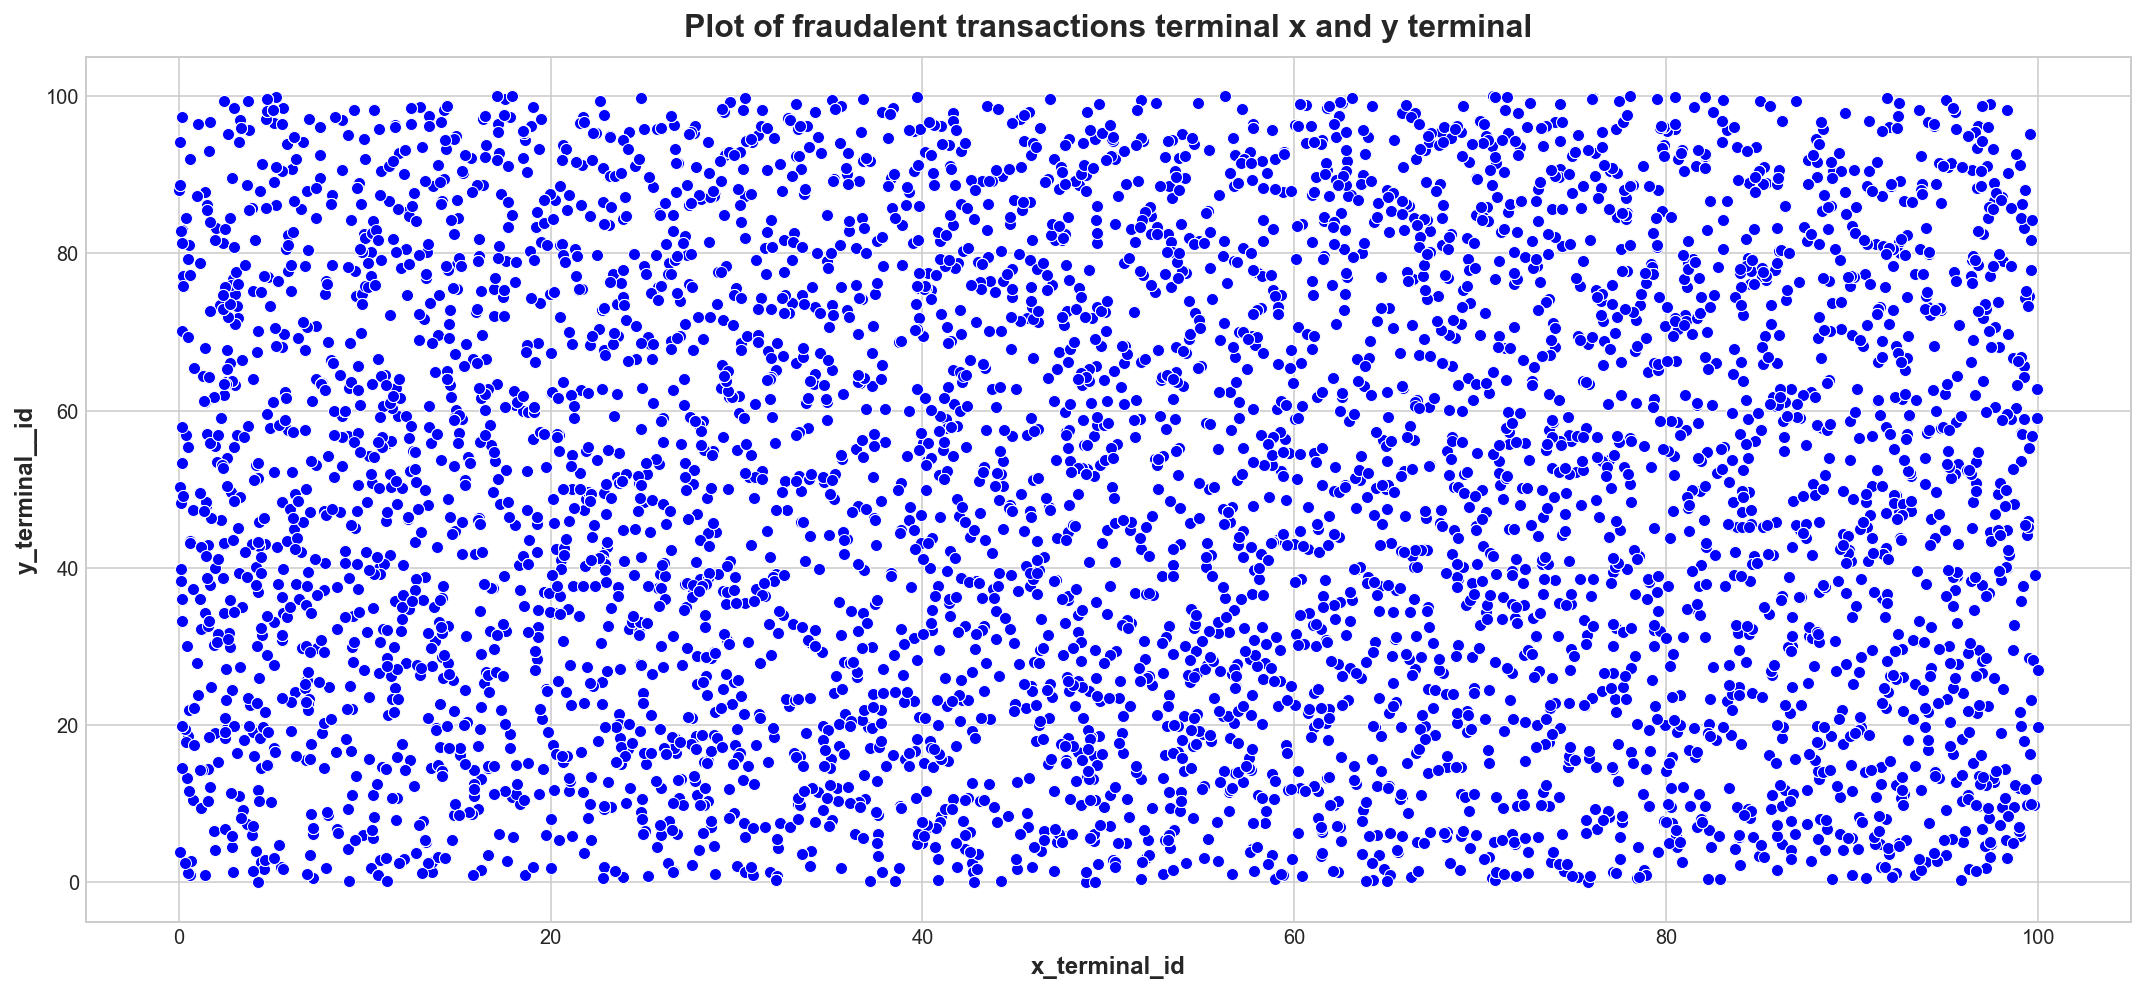

In [14]:
plt.rc("figure", autolayout=True, figsize=(15, 7))
sns.scatterplot(x=fraudalent_cases['x_terminal_id'],y=fraudalent_cases['y_terminal__id'],color = 'blue')
plt.title("Plot of fraudalent transactions terminal x and y terminal")

Text(0.5, 1.0, 'Plot of authentic transactions terminal x and y coordinates')

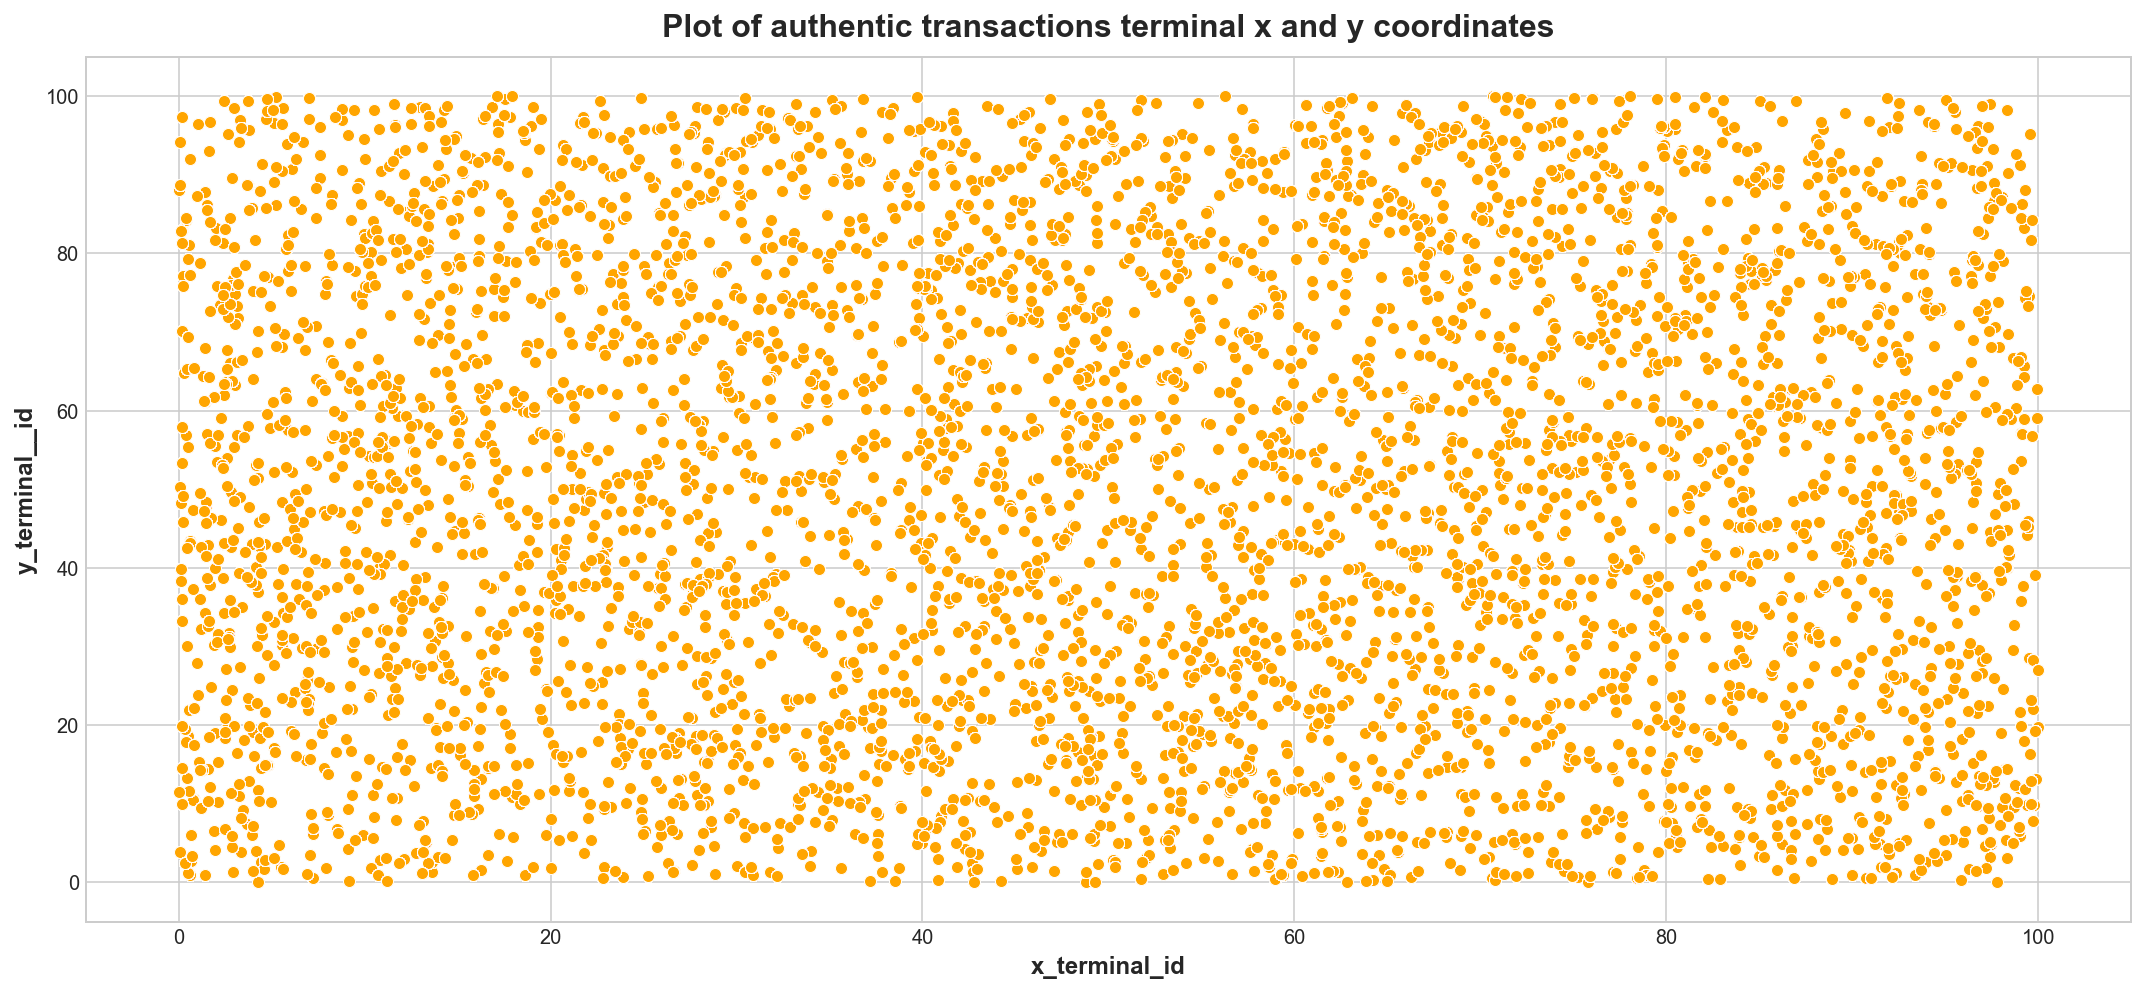

In [17]:
plt.rc("figure", autolayout=True, figsize=(15, 7))
sns.scatterplot(x=authentic_cases['x_terminal_id'],y=authentic_cases['y_terminal__id'],color = 'orange')
plt.title("Plot of authentic transactions terminal x and y coordinates")